___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df=pd.read_csv("Churn_Modelling.csv") # Read the data

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.info() # to get the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape 

(10000, 14)

In [6]:
df.describe() # to get the summary of the dataframe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [7]:
df.isnull().sum() # No missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

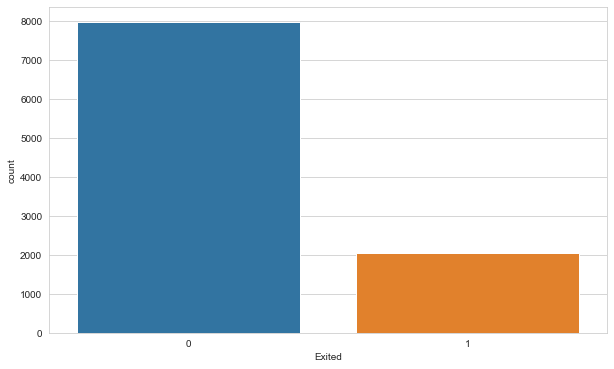

In [8]:
sns.countplot(df["Exited"]) # No of customers who exited the bank

<AxesSubplot:>

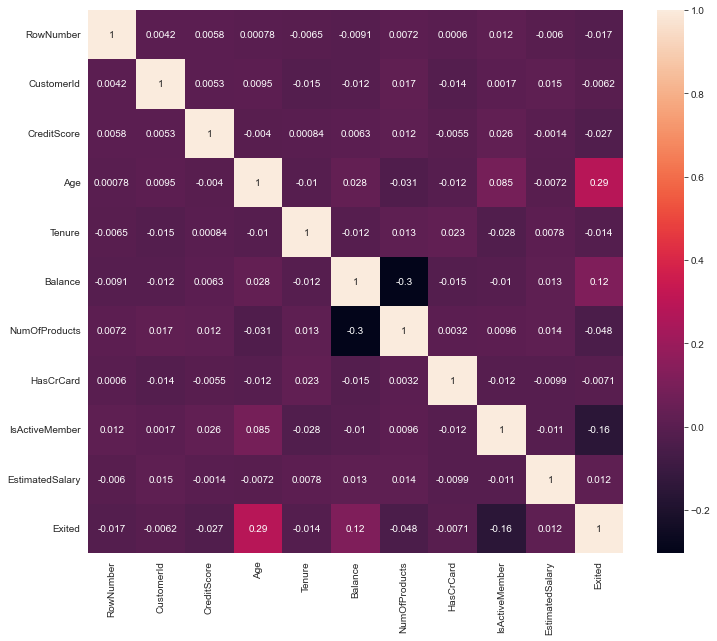

In [9]:
plt.figure(figsize=(12,10)) # to change the size of the plot
sns.heatmap(df[df.describe().columns].corr(),annot=True) # Heatmap of correlation between variables

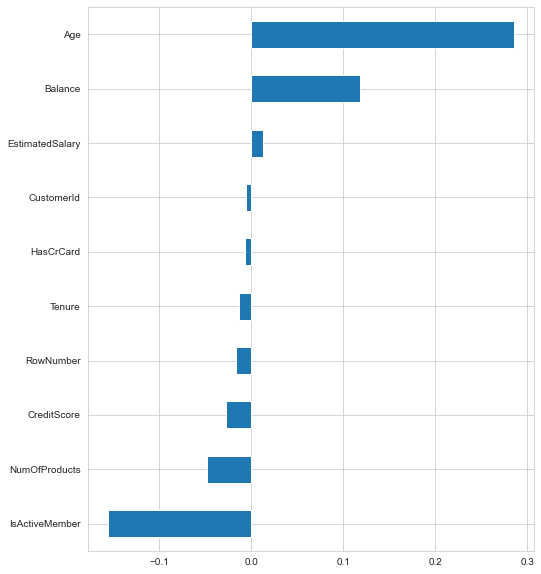

In [10]:
plt.figure(figsize = (8,10)) # to change the size of the plot
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh"); # Bar plot of correlation between variables

In [11]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1) # Dropping unnecessary columns

In [12]:
df.head() # Display first 5 rows of the dataframe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [13]:
df.Geography.value_counts() # No of customers from each geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.IsActiveMember.value_counts() # No of customers who are active members

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='Balance', ylabel='Age'>

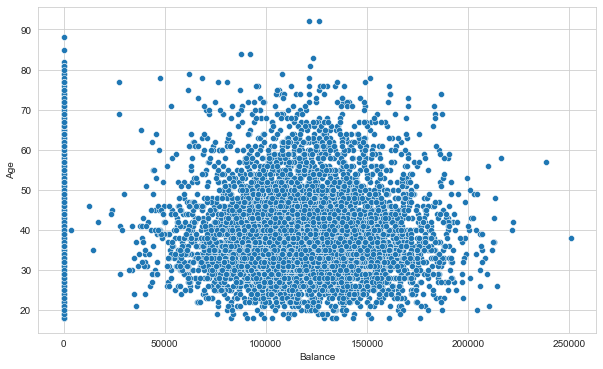

In [15]:
sns.scatterplot(data=df, x="Balance", y="Age") 

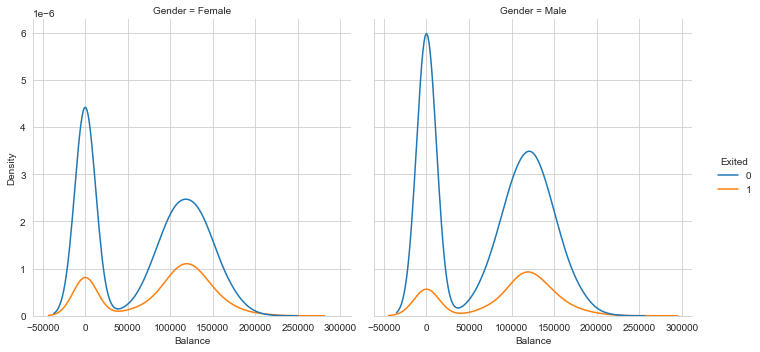

In [16]:
sns.displot(data=df, x="Balance", hue="Exited", col="Gender", kind="kde")

In [17]:
df["diff"]=0 
df.loc[df.Balance<=50000,"diff"]=2
df.loc[df.Balance>50000,"diff"]=4


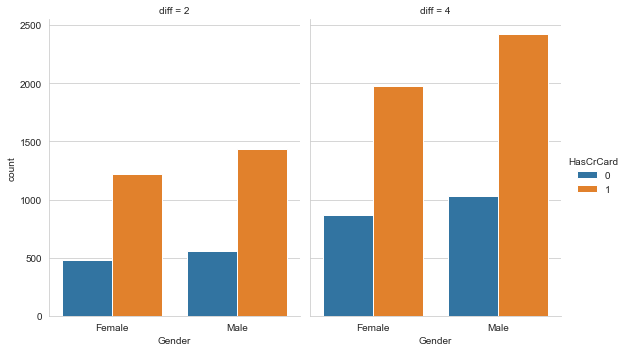

In [18]:
sns.catplot(x="Gender", hue="HasCrCard",col="diff", data=df,kind="count",height=5, aspect=.8) 

<Figure size 576x720 with 0 Axes>

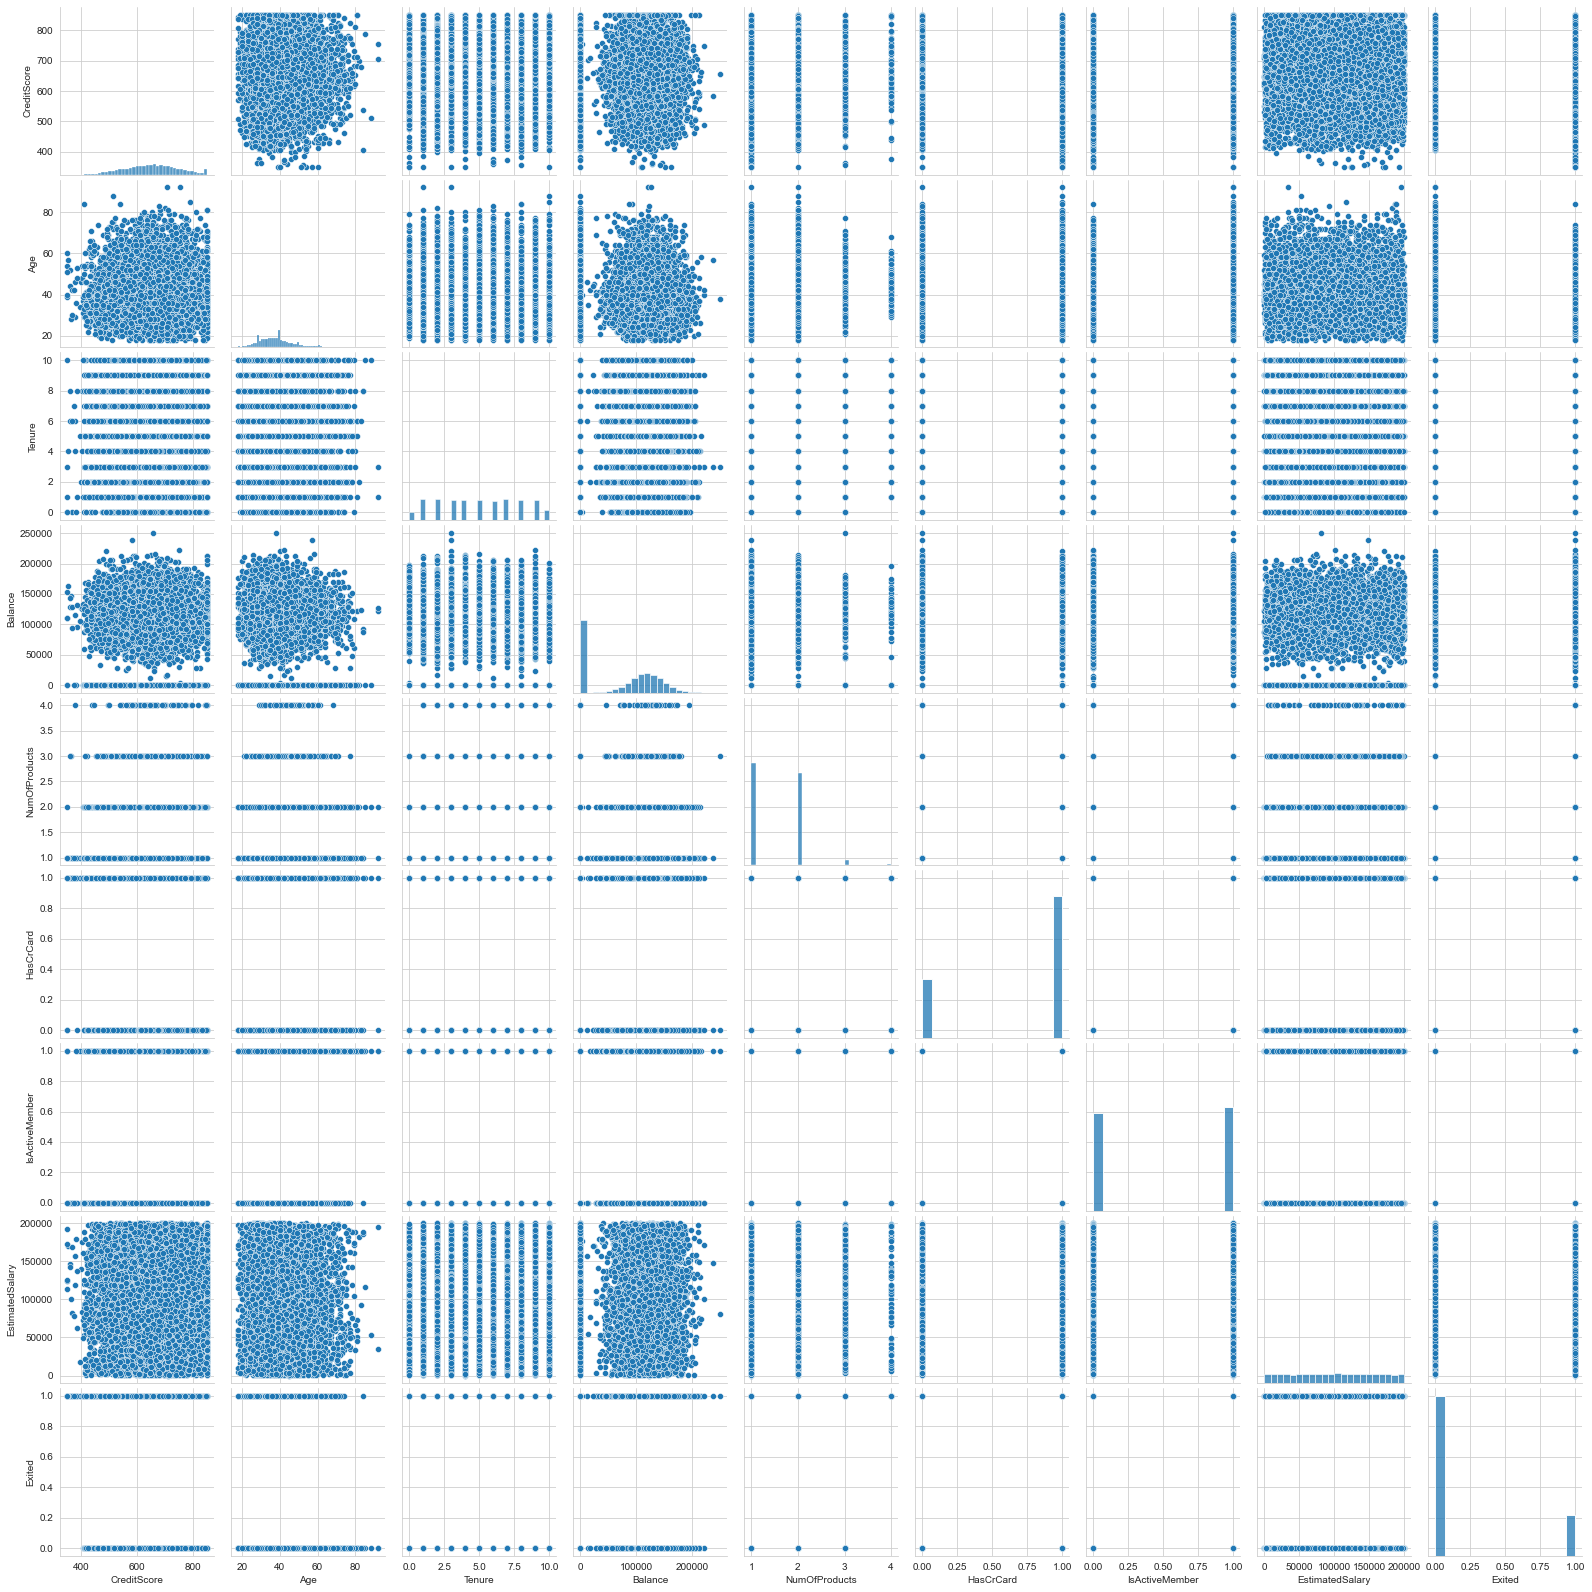

In [34]:
plt.figure(figsize = (8,10)) 
sns.pairplot(df) 

In [35]:
df_dum=pd.get_dummies(df) 

## Preprocessing of Data
- Train | Test Split, Scalling

## Modelling & Model Performance

### Import related libraries

### Creating Model

### without class_weigth

#### Evaluate

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

#### Evaluate

## GridSearchCV

#### Evaluate

## Final Model and Model Deployment

### Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___